In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt


gender_colormap = {"female": "hotpink", "male": "skyblue", "baseline": "green"}


df = pd.read_csv("../data/processed/Claude_3_Haiku.csv")

Language abstraction/concreteness
WilcoxonResult(statistic=np.float64(nan), pvalue=np.float64(nan))
lexical diversity
WilcoxonResult(statistic=np.float64(2197.0), pvalue=np.float64(7.920224863101476e-11))
reading difficulty
WilcoxonResult(statistic=np.float64(2300.0), pvalue=np.float64(2.1141928505377975e-09))
analytical
WilcoxonResult(statistic=np.float64(nan), pvalue=np.float64(nan))
self references
WilcoxonResult(statistic=np.float64(4028.0), pvalue=np.float64(0.002164169582296189))
certainty
WilcoxonResult(statistic=np.float64(0.0), pvalue=np.float64(1.1087892528281638e-09))
emotionality
WilcoxonResult(statistic=np.float64(4075.5), pvalue=np.float64(0.004164756788838717))
Hedge
WilcoxonResult(statistic=np.float64(5075.5), pvalue=np.float64(0.3319000504031989))


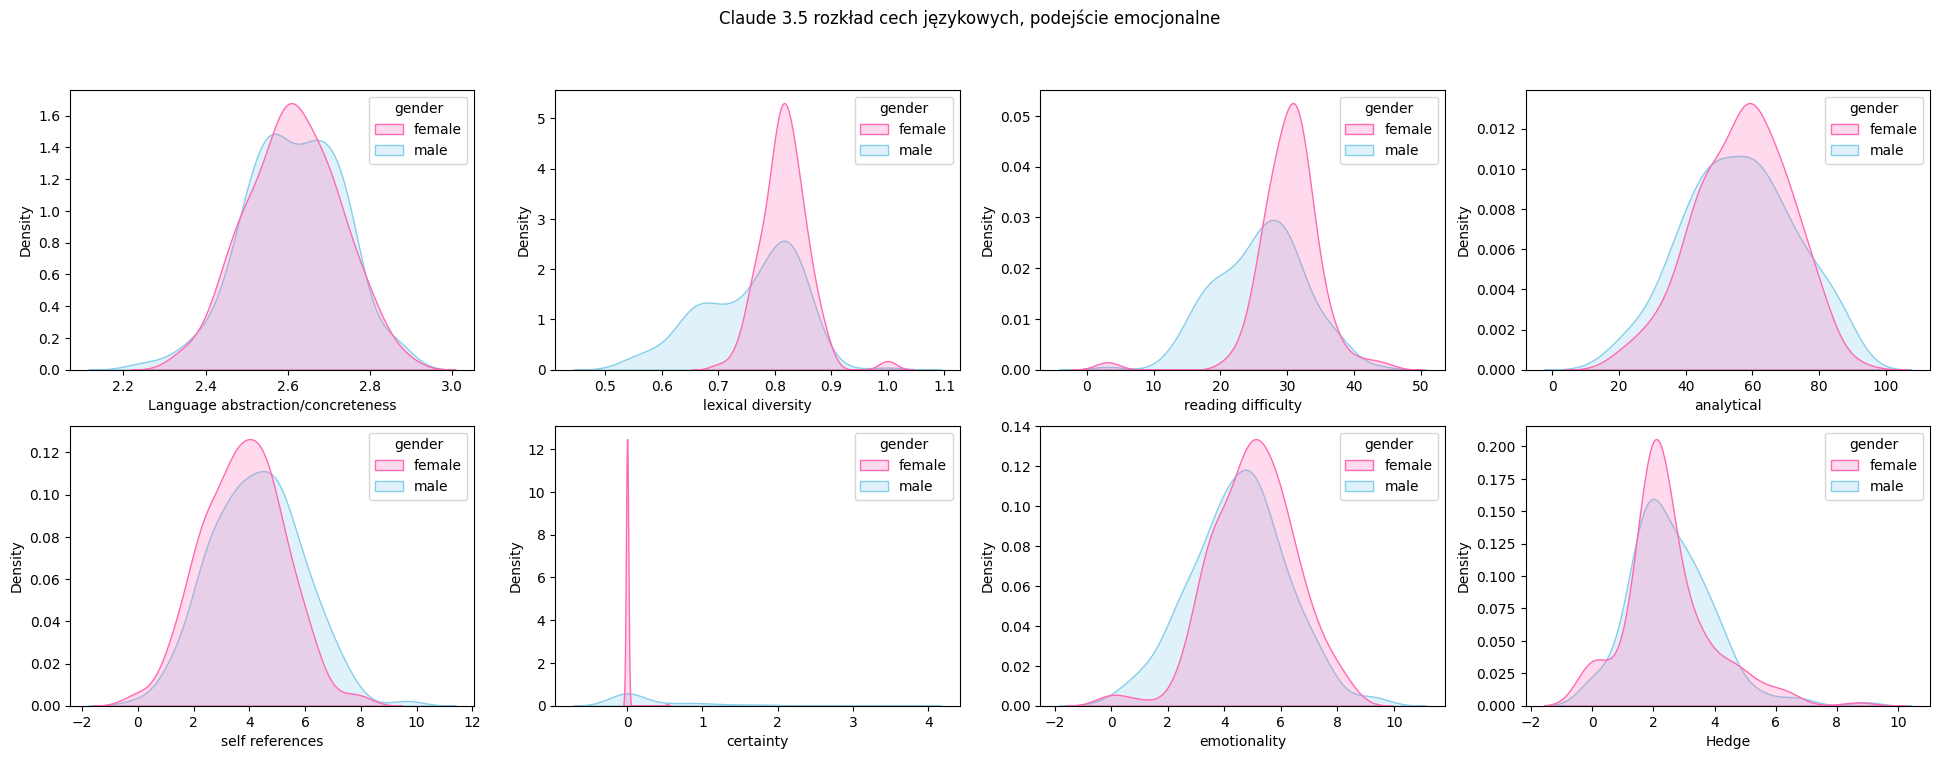

In [2]:
emotional = df[df["type"] == "emotional"]
fig, axes = plt.subplots(2, 4, figsize=(24, 8))
for i, measure in enumerate(
    (
        "Language abstraction/concreteness",
        "lexical diversity",
        "reading difficulty",
        "analytical",
        "self references",
        "certainty",
        "emotionality",
        "Hedge",
    )
):
    print(measure)
    print(
        wilcoxon(
            emotional[emotional["gender"] == "male"][measure],
            emotional[emotional["gender"] == "female"][measure],
        )
    )
    sns.kdeplot(
        emotional,
        x=measure,
        hue="gender",
        fill=True,
        palette=gender_colormap,
        ax=axes[i // 4, i % 4],
    )
plt.suptitle("Claude 3.5 rozkład cech językowych, podejście emocjonalne")
plt.show()